# Classificador de Fake News

<p align=center>
  <img src="https://images.unsplash.com/photo-1557992260-ec58e38d363c?q=80&w=1974&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width = 700 height = 500>
</p>

Vivemos na era de maior disponibilidade de informações que o mundo já viu. Nunca foi tão fácil acessar notícias e conhecer o que está acontecendo ao redor do mundo, visto que a popularidade dos celulares e computadores, bem como a disponibilidade da Internet, tornaram possível que não somente conseguíssemos ver o que está acontecendo, mas também interagir com outras pesssoas interessadas.

Também vivemos num mundo que gera um volume enorme de dados diariamente, com muitos desses dados tendo como fonte os textos gerados nos sites de notícias, nas mídias sociais, entre outras. Com esse grande influxo de informações, podemos ficar sobrecarregados ao julgar a confiabilidade de tantas fontes de informações, e nosso tempo limitado pode não permitir que apliquemos nossos conhecimentos e experiências de vida para discernir uma notícia verdadeira da falsa. 

Os algoritmos de aprendizado profundo, com suas estruturas de redes neurais e a tecnologia de processamento de linguagem natural (**NLP**), podem nos ajudar na tarefa de identificar padrões em notícias e informações que podem ser duvidosas. Por se tratar de um problema em que os dados não estão estruturados, pode ser difícil para cientistas de dados definirem regras e parâmetros relevantes para a classificação de notícias. 

Porém, algoritmos de _Deep Learning_ - juntamente com o processamento de _strings_ via **NLP** - podem analisar vastas quantidades de dados desestruturados em formato de texto e, a partir da estrutura de redes neurais, com suas técnicas de _forward propagation_ e _backpropagation_, atribuir funções de custo para parâmetros e corrigir os erros a cada iteração. Deste modo, somos capazes de lidar com esse problema e construir modelos confiáveis de processamento e classificação de _Fake News_.

Este projeto visa, portanto, construir um modelo de Deep Learning baseado em técnicas de NLP para classificação de notícias falsas. Para isso, utilizaremos a biblioteca de construção _end-to-end_ de modelos de _Deep Learning_ **TensorFlow**.

### Bibliotecas

In [90]:
'''Bibliotecas de análise de dados e visualização'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [91]:
'''Bibliotecas de Deep Learning'''
import tensorflow as tf
from tensorflow import keras

### Importando os dados

In [33]:
path_train = r'C:\Users\Usuario\OneDrive\Documentos\Projetos Visual Studio Code\DSNP 3.0\Datasets\train.csv'
path_test = r'C:\Users\Usuario\OneDrive\Documentos\Projetos Visual Studio Code\DSNP 3.0\Datasets\test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [30]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [41]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


### 1. Análise Exploratória dos Dados

#### Dimensões dos conjuntos

In [40]:
print('Dimensões do DataFrame - Treino',
      f'\nEntradas: {df_train.shape[0]}',
      f'\nVariáveis: {df_train.shape[1]}')

print('\nDimensões do DataFrame- Teste',
      f'\nEntradas: {df_test.shape[0]}',
      f'\nVariáveis: {df_test.shape[1]}')

Dimensões do DataFrame - Treino 
Entradas: 20800 
Variáveis: 5

Dimensões do DataFrame- Teste 
Entradas: 5200 
Variáveis: 4


In [18]:
df_train.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

#### Dicionário de Variáveis

Como pudemos ver, no total temos 26000 entradas divididas entre os conjuntos de treino e teste, com 5 variáveis:

- id: Número de identificação do exemplo;
- title: Título da notícia;
- author: Autor da notícia;
- text: Corpo do texto da notícia;
- label: Rótulo de notícia factual (0) ou Falsa (1)

O rótulo está ausente para o conjunto de teste, pois este será usado para testar a capacidade preditiva e de generalização do modelo.

#### Valores ausentes

In [27]:
print('Valores ausentes por coluna (%)')
round(df.isna().sum().sort_values(ascending = False) * 100 / df.__len__(), 2)

Valores ausentes por coluna (%)


author    9.41
title     2.68
text      0.19
id        0.00
label     0.00
dtype: float64

In [47]:
print('Valores únicos por coluna')
df_train.nunique()

Valores únicos por coluna


id        20800
title     19803
author     4201
text      20386
label         2
dtype: int64

De modo geral, temos um conjunto de dados com dados bastantes únicos, como era de se esperar havendo notícias diversas, com títulos e textos diversos.

In [48]:
df_train['author'].describe()

count       18843
unique       4201
top       Pam Key
freq          243
Name: author, dtype: object

Na coluna _author_, existem 4201 ocorrências únicas, sendo as notícias da autora Pam Key a mais presente no conjunto de dados.

In [97]:
df_train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

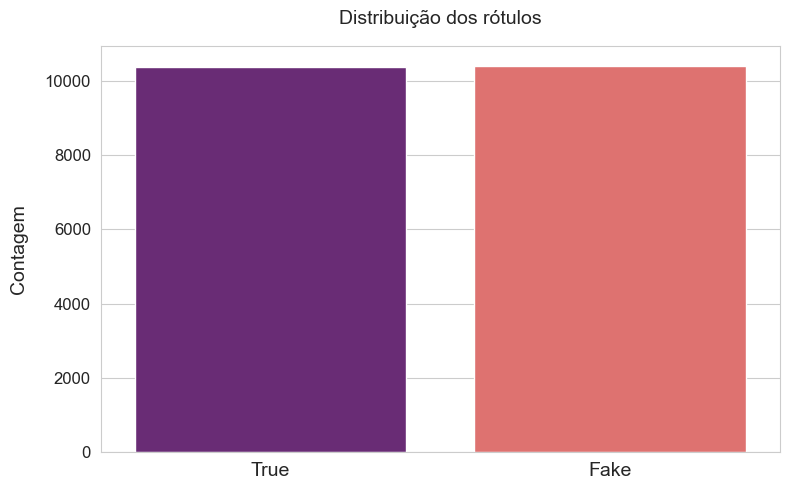

In [94]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.countplot(df['label'], x = df['label'].index, palette = 'magma')

ax.set_title('Distribuição dos rótulos', fontsize = 14, pad = 16)
ax.set_xlabel('')
ax.set_xticks([0, 1], labels = ['True', 'Fake'], fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14, labelpad = 12)
ax.set_yticklabels([0, 2000, 4000, 6000, 8000, 10000], fontsize = 12)

fig.tight_layout()
fig.show()

Como podemos ver, o conjunto de treino possui exemplos balanceados entre as classes, com 10413 notícias falsas e 10387 notícias factuais. Como sabemos, o balanceamento dos dados é importante para não enviesar o algoritmo com relação a uma classe majoritária. Assim, garantimos maior poder de generalização e melhor performance em dados novos.